**Задание 9.1**

Выведите города с максимальным и минимальным весом единичной доставки. Столбцы к выводу — city_name, weight.

```sql
(
    SELECT
       c.city_name,
       s.weight
    FROM sql.shipment s
       JOIN sql.city c ON s.city_id=c.city_id
    ORDER BY 2 desc
    LIMIT 1
)
UNION ALL
(
    SELECT
       c.city_name,
       s.weight
    FROM sql.shipment s
       JOIN sql.city c ON s.city_id=c.city_id
    ORDER BY 2
    LIMIT 1
)




**Задание 9.2**

Выведите идентификационные номера клиентов (cust_id), которые совпадают с идентификационными номерами доставок (ship_id). Столбец к выводу — mutual_id. Отсортируйте по возрастанию.

Совпадают - intersect

```sql
SELECT
    c.cust_id as mutual_id
FROM
    sql.customer as c
INTERSECT
SELECT
    s.ship_id
FROM
    sql.shipment as s
ORDER BY 1

**Задание 9.3**

Создайте справочник, содержащий уникальные имена клиентов, которые являются производителями (cust_type='manufacturer'), и производителей грузовиков, а также описание объекта — 'КЛИЕНТ' или 'ГРУЗОВИК'. Столбцы к выводу — object_name, object_description. Отсортируйте по названию в алфавитном порядке.

```sql
SELECT
    c.cust_name as object_name,
    'КЛИЕНТ' as object_discription
FROM
    sql.customer as c
WHERE c.cust_type='manufacturer'

UNION
SELECT
    t.make,
    'ГРУЗОВИК'
FROM
    sql.truck as t

ORDER BY object_name ASC
```

### <CENTER> ↓ Вопросы на собеседовании ↓


**Вопрос 1**
Скачайте [файл](https://lms-cdn.skillfactory.ru/assets/courseware/v1/fb9124cd203bfaf5573ecf478899c6fc/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/SQL_test1.xlsx) и выполните задания в нём.


**Вопрос 2**
Дан источник данных — таблица `TEST_SQL`.
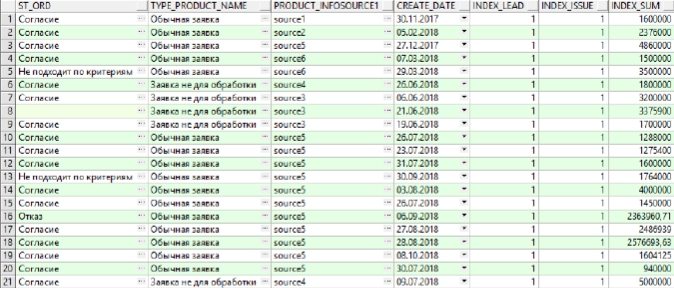

Поля таблицы:

- *ST_ORD (Varchar)* — статус заявки;
- *TYPE_PRODUCT_NAME (Varchar)* — тип заявки;
- *PRODUCT_INFOSOURCE1 (Varchar)* — источник;
- *CREATE_DATE (Date)* — дата создания заявки;
- *INDEX_LEAD (Number)* — индикатор заявки (флаг 0/1 определяет регистрацию лида в системе);
- *INDEX_ISSUE (Number)* — индикатор выдачи (флаг 0/1 определяет наличие выдачи по заявке);
- *INDEX_SUM (Number)* — сумма по продукту.

**Задание 4.** Каким будет результат выполнения запросов ниже, если в поле CREATE_DATE будет содержаться значение 30.11.2017?

```sql
select trunc(create_date, 'dd') , create_date 
from test_sql

select trunc(create_date, 'mm') , create_date 
from test_sql

select trunc(create_date, 'mm')+1, create_date 
from test_sql
```

**Задание 1.** Сгруппируйте по месяцам количество заявок и сумму выдач, вычислите долю выдач.

```sql
SELECT
    -- Форматируем дату для группировки по месяцу и году (формат может отличаться в разных СУБД)
    TO_CHAR(CREATE_DATE, 'YYYY-MM') AS report_month,

    -- Общее количество заявок в рамках месяца (каждая строка - это 1 заявка)
    COUNT(*) AS total_applications_count,

    -- Сумма по продуктам, по которым была выдача (если INDEX_ISSUE = 1)
    SUM(CASE WHEN INDEX_ISSUE = 1 THEN INDEX_SUM ELSE 0 END) AS total_issue_sum,

    -- Вычисление доли выданных заявок (в процентах)
    -- SUM(INDEX_ISSUE) считает количество строк, где INDEX_ISSUE = 1 (так как это флаг 0/1)
    -- CAST используется для корректного деления и получения десятичного результата
    CAST(SUM(INDEX_ISSUE) AS DECIMAL(10, 2)) / COUNT(*) * 100 AS issue_share_percent

FROM
    ваша_таблица_с_данными_заявок -- Замените на фактическое имя вашей таблицы

GROUP BY
    -- Группировка по году и месяцу для корректного агрегирования
    TO_CHAR(CREATE_DATE, 'YYYY-MM')

ORDER BY
    report_month ASC; -- Сортировка по возрастанию даты

**Задание 2.** Определите источник, через который пришло больше всего заявок.

```sql
SELECT
    PRODUCT_INFOSOURCE1 AS source_name,
    COUNT(*) AS applications_count
FROM
    ваша_таблица_с_данными_заявок -- Замените на фактическое имя вашей таблицы
GROUP BY
    PRODUCT_INFOSOURCE1
ORDER BY
    applications_count DESC
FETCH FIRST 1 ROWS ONLY; -- Используется для ограничения вывода только одной верхней строки
```

**Задание 3.** Выделите количество заявок, которые являются ошибочными.

*Критерии ошибки:*

- Статус заявки не проставляется или имеет значение «тестовая заявка».
Заявка была создана в августе 2018 года.
- Присутствует индикатор выдачи, но при этом лид не был зарегистрирован в системе.

```sql
SELECT
    COUNT(*) AS error_applications_count
FROM
    ваша_таблица_с_данными_заявок -- Замените на фактическое имя вашей таблицы
WHERE
    -- Критерий 1: Статус заявки не проставляется (NULL/пусто) ИЛИ имеет значение «тестовая заявка»
    (ST_ORD IS NULL OR ST_ORD = '' OR ST_ORD = 'тестовая заявка')

    OR

    -- Критерий 2: Заявка была создана в августе 2018 года
    -- Форматирование даты зависит от СУБД (пример для PostgreSQL/Oracle)
    (TO_CHAR(CREATE_DATE, 'YYYY-MM') = '2018-08')
    -- Если у вас MS SQL Server, используйте: (FORMAT(CREATE_DATE, 'yyyy-MM') = '2018-08')
    -- Если у вас MySQL, используйте: (DATE_FORMAT(CREATE_DATE, '%Y-%m') = '2018-08')

    OR

    -- Критерий 3: Присутствует индикатор выдачи (INDEX_ISSUE = 1), но лид не был зарегистрирован (INDEX_LEAD = 0 или NULL)
    (INDEX_ISSUE = 1 AND (INDEX_LEAD = 0 OR INDEX_LEAD IS NULL));

    ```

**Задание 4.** Каким будет результат выполнения запросов ниже, если в поле CREATE_DATE будет содержаться значение 30.11.2017?

```sql
select trunc(create_date, 'dd') , create_date 
from test_sql
```
**Результат:**
TRUNC(CREATE_DATE, 'DD')	CREATE_DATE
30.11.2017	                30.11.2017

*Объяснение:*
TRUNC(..., 'DD') усекает (округляет) дату до начала дня (до полуночи). Поскольку 30.11.2017 уже является датой без указания времени, результат остается тем же самым значением.

```sql
select trunc(create_date, 'mm') , create_date 
from test_sql
```
**Результат:**

TRUNC(CREATE_DATE, 'MM')	CREATE_DATE
01.11.2017	                30.11.2017

*Объяснение:*
TRUNC(..., 'MM') усекает дату до начала месяца (первого дня месяца, 00:00). Независимо от того, какой день указан в CREATE_DATE, результатом будет первый день того же месяца: 01.11.2017.

```sql
select trunc(create_date, 'mm')+1, create_date 
from test_sql
```
**Результат:**

TRUNC(CREATE_DATE, 'MM')+1	CREATE_DATE
02.11.2017	                30.11.2017

*Объяснение:*
Сначала выполняется TRUNC(..., 'MM'), что дает 01.11.2017 (как в предыдущем запросе). Затем к этой дате прибавляется +1. В Oracle SQL прибавление числа к дате означает добавление этого количества дней. Таким образом, к первому ноября добавляется один день, в результате чего получается второй день того же месяца: 02.11.2017.



